In [5]:
import pandas as pd
import os

ruta_data = "../Data"

# Facebook
facebook_df = pd.read_json(os.path.join(ruta_data, "Facebook_data.json"))

# Instagram
instagram_df = pd.read_json(os.path.join(ruta_data, "Instagram_data.json"))

#  Twitter
twitter_df = pd.read_json(os.path.join(ruta_data, "Twitter_data.json"))



facebook_df['plataforma'] = 'Facebook'
instagram_df['plataforma'] = 'Instagram'
twitter_df['plataforma'] = 'Twitter'

facebook_df['retweets'] = None
facebook_df['respuestas'] = None

instagram_df['compartidos'] = None
instagram_df['retweets'] = None
instagram_df['respuestas'] = None

twitter_df['comentarios'] = None
twitter_df['compartidos'] = None

df_redes = pd.concat([facebook_df, instagram_df, twitter_df], ignore_index=True)
df_redes['fecha'] = pd.to_datetime(df_redes['fecha'])
df_redes.head(5)



,id,usuario,fecha,contenido,likes,comentarios,compartidos,plataforma,retweets,respuestas
0,1,usuario1,2025-09-19,"Una experiencia maravillosa, muy satisfecho. #...",79,87,26,Facebook,None,None
1,2,usuario2,2025-09-05,El peor servicio que he recibido. #colera,341,98,7,Facebook,None,None
2,3,usuario3,2025-03-13,"Este servicio es excelente, estoy muy satisfec...",144,25,41,Facebook,None,None
3,4,usuario4,2025-07-28,No puedo creer lo mal que funciona esto. #colera,366,41,37,Facebook,None,None
4,5,usuario5,2025-05-14,"Esto es increible, estoy extasiado! #extasis",451,4,31,Facebook,None,None


In [6]:
# Verificamos si hay textos faltantes
faltantes = df_redes['contenido'].isnull().sum()
print(f"Cantidad de textos faltantes: {faltantes}")

Cantidad de textos faltantes: 0


## 2. Preprocesamiento de textos

En esta sección se realiza el preprocesamiento necesario para preparar el texto para el análisis. Las tareas incluyen:
- Normalización del texto (minúsculas y eliminación de símbolos innecesarios)
- Tokenización
- Lematización
- Eliminación de stop words
- Manejo de datos faltantes


In [10]:
import sys
sys.path.append('../Scripts')

from procesamiento_texto import limpiar_y_tokenizar

df_redes['tokens'] = df_redes['contenido'].apply(limpiar_y_tokenizar)
df_redes[['contenido', 'tokens']].head()


,contenido,tokens
0,"Una experiencia maravillosa, muy satisfecho. #...","[experiencia, maravillosa, satisfecho, #, sati..."
1,El peor servicio que he recibido. #colera,"[peor, servicio, recibido, #, colera]"
2,"Este servicio es excelente, estoy muy satisfec...","[servicio, excelente, satisfecho, #, satisfacc..."
3,No puedo creer lo mal que funciona esto. #colera,"[puedo, creer, mal, funciona, #, colera]"
4,"Esto es increible, estoy extasiado! #extasis","[increible, extasiado, #, extasis]"


In [ ]:
df_redes['longitud'] = df_redes['tokens'].apply(len)
df_redes

In [14]:
df_redes['longitud'] = df_redes['tokens'].apply(len)

print("Promedio de palabras por publicación:", df_redes['longitud'].mean())
print("Publicación más corta (tokens):", df_redes['longitud'].min())
print("Publicación más larga (tokens):", df_redes['longitud'].max())



Promedio de palabras por publicación: 5.228148148148148
Publicación más corta (tokens): 4
Publicación más larga (tokens): 7


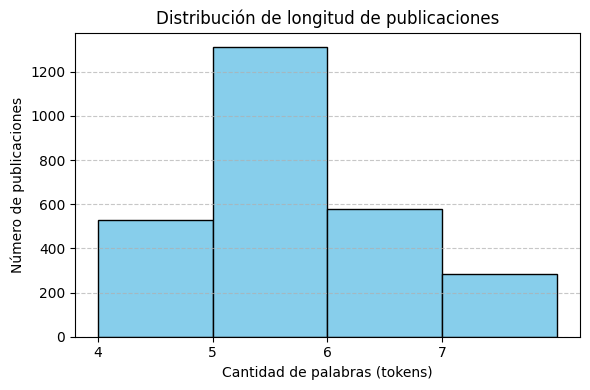

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Histograma de la longitud de publicaciones
plt.figure(figsize=(6, 4))
plt.hist(df_redes['longitud'], bins=range(df_redes['longitud'].min(), df_redes['longitud'].max() + 2),
         color='skyblue', edgecolor='black')
plt.title("Distribución de longitud de publicaciones")
plt.xlabel("Cantidad de palabras (tokens)")
plt.ylabel("Número de publicaciones")
plt.xticks(range(df_redes['longitud'].min(), df_redes['longitud'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('../Outputs/histograma_longitud.jpg')
